## Complete EDA & Implementation of algorithm on Airplane-accident data.

## Problem Statement:-

Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv('train.csv')

**Detail description of data attributes**

![](airplane-describe.png)

## Analysis of train dataset.

In [3]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
train.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


# Univariate Analysis
            
            A. Outlier detections
            B. Missing value identification
            C. Imputation

Hence each attribute analysis on scatterplot and boxplot,

On the behalf of **Shape,Center,Spread,Outliers** we analysis the type of particular attribute.


## Accident_ID 	

**unique id assigned to each row**

In [6]:
train['Accident_ID'].describe()

count    10000.000000
mean      6266.554200
std       3610.170288
min          2.000000
25%       3139.750000
50%       6280.500000
75%       9391.500000
max      12500.000000
Name: Accident_ID, dtype: float64

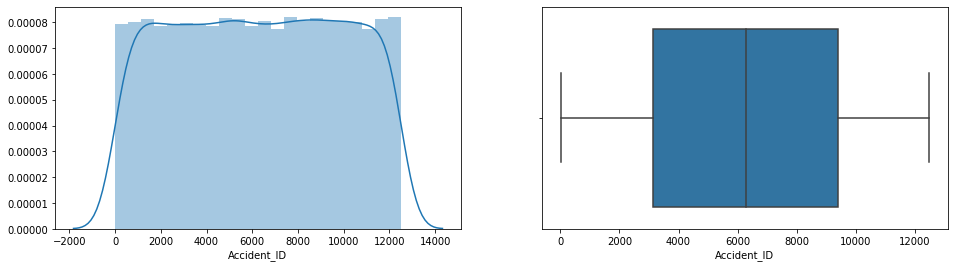

In [7]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Accident_ID'])

plt.subplot(2,2,2)
sns.boxplot(train['Accident_ID'])

plt.show()

In [8]:
train = train.drop(['Accident_ID'],axis=1)

This attribute show the categorical value of the data, which means accident_id its show particular no. or identity for the accident.

## Adverse_Weather_Metric

In [9]:
train['Adverse_Weather_Metric'].describe()

count    10000.000000
mean         0.255635
std          0.381128
min          0.000316
25%          0.012063
50%          0.074467
75%          0.354059
max          2.365378
Name: Adverse_Weather_Metric, dtype: float64

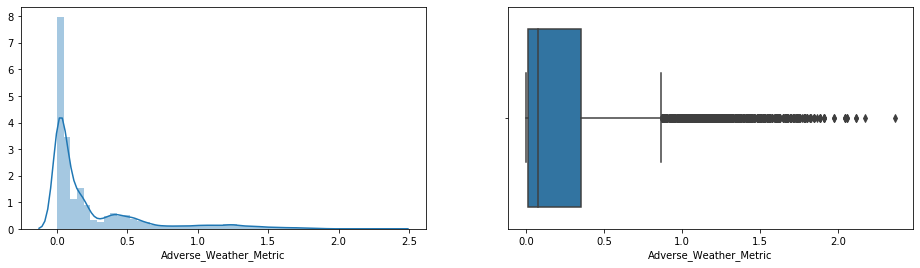

In [10]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Adverse_Weather_Metric'])

plt.subplot(2,2,2)
sns.boxplot(train['Adverse_Weather_Metric'])

plt.show()

## Violations 	

**number of violations that the aircraft received during inspections**

In [11]:
train['Violations'].describe()

count    10000.00000
mean         2.01220
std          1.03998
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          5.00000
Name: Violations, dtype: float64

In [12]:
train['Violations'].unique()

array([3, 2, 1, 0, 4, 5])

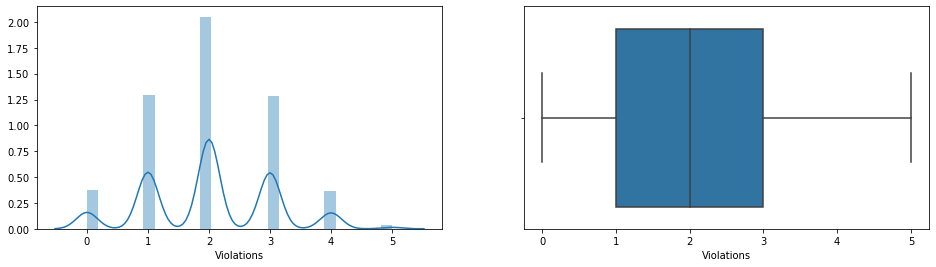

In [13]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Violations'])

plt.subplot(2,2,2)
sns.boxplot(train['Violations'])

plt.show()

## Max_Elevation 

**height from the ground according to basic understanding the measurement in metres**

In [14]:
train['Max_Elevation'].describe()

count    10000.000000
mean     32001.803282
std       9431.995196
min        831.695553
25%      25757.636908
50%      32060.336419
75%      38380.641513
max      64297.651218
Name: Max_Elevation, dtype: float64

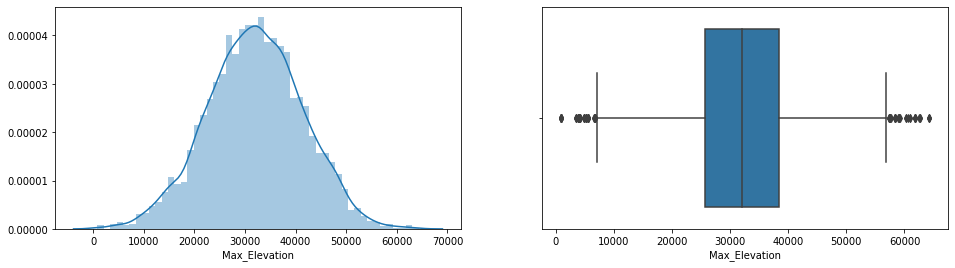

In [15]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Max_Elevation'])

plt.subplot(2,2,2)
sns.boxplot(train['Max_Elevation'])

plt.show()

## Accident_Type_Code 

**the type of accident (factor, not numeric)**

In [16]:
train['Accident_Type_Code'].describe()

count    10000.000000
mean         3.814900
std          1.902577
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Accident_Type_Code, dtype: float64

In [17]:
train['Accident_Type_Code'].unique()

array([2, 7, 3, 4, 1, 6, 5])

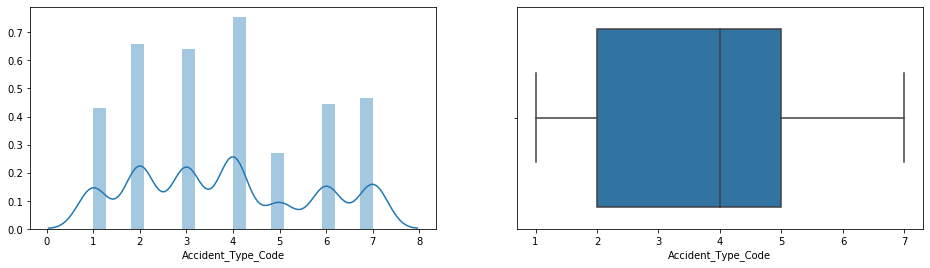

In [18]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Accident_Type_Code'])

plt.subplot(2,2,2)
sns.boxplot(train['Accident_Type_Code'])

plt.show()

## Cabin_Temperature

**the last recorded temperature before the incident, measured in degrees fahrenheit**

In [19]:
train['Cabin_Temperature'].describe()

count    10000.000000
mean        79.969331
std          2.759739
min         74.740000
25%         77.960000
50%         79.540000
75%         81.560000
max         97.510000
Name: Cabin_Temperature, dtype: float64

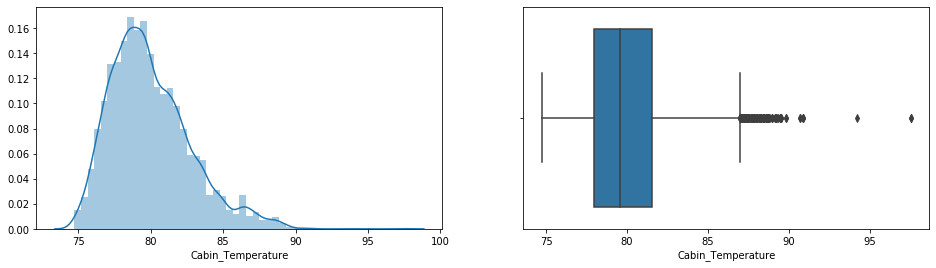

In [20]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Cabin_Temperature'])

plt.subplot(2,2,2)
sns.boxplot(train['Cabin_Temperature'])

plt.show()

## Turbulence_In_gforces

**the recorded/estimated turbulence experienced during the accident**

In [21]:
train['Turbulence_In_gforces'].describe()

count    10000.000000
mean         0.381495
std          0.121301
min          0.134000
25%          0.293665
50%          0.365879
75%          0.451346
max          0.882648
Name: Turbulence_In_gforces, dtype: float64

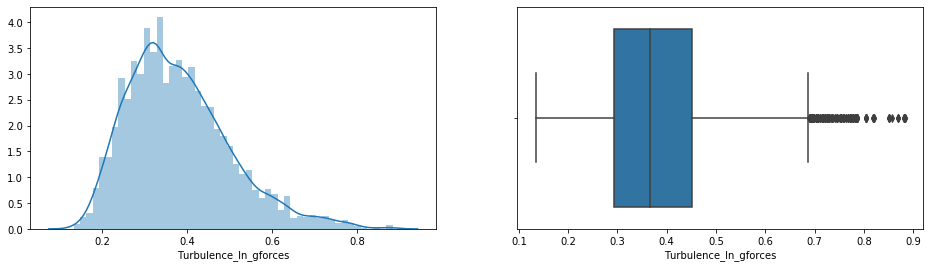

In [22]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Turbulence_In_gforces'])

plt.subplot(2,2,2)
sns.boxplot(train['Turbulence_In_gforces'])

plt.show()

## Control_Metric 	

**An estimation of how much control the pilot had during the incident given the factors at play** 

In [23]:
train['Control_Metric'].describe()

count    10000.000000
mean        65.145324
std         11.882934
min          0.000000
25%         56.927985
50%         65.587967
75%         73.336372
max        100.000000
Name: Control_Metric, dtype: float64

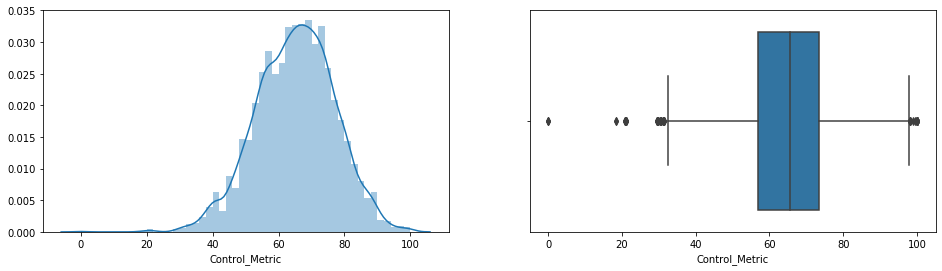

In [24]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Control_Metric'])

plt.subplot(2,2,2)
sns.boxplot(train['Control_Metric'])

plt.show()

## Total_Safety_Complaints

**number of complaints from mechanics prior to the accident**

In [25]:
train['Total_Safety_Complaints'].describe()

count    10000.000000
mean         6.564300
std          6.971982
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         54.000000
Name: Total_Safety_Complaints, dtype: float64

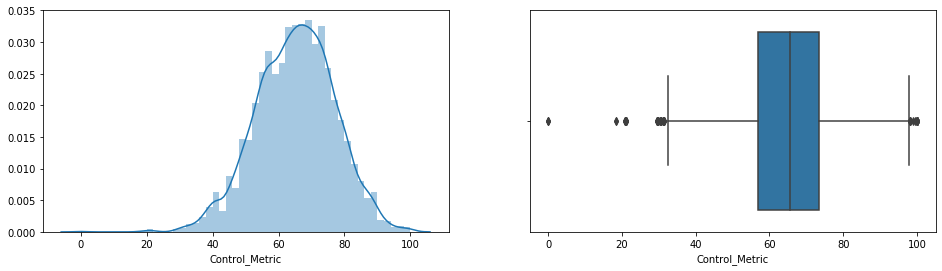

In [26]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Control_Metric'])

plt.subplot(2,2,2)
sns.boxplot(train['Control_Metric'])

plt.show()

## Days_Since_Inspection 	

**how long the plane went without inspection before the incident**

In [27]:
train['Days_Since_Inspection'].describe()

count    10000.000000
mean        12.931100
std          3.539803
min          1.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         23.000000
Name: Days_Since_Inspection, dtype: float64

In [28]:
train['Days_Since_Inspection'].unique()

array([14, 10, 13, 11, 15, 18,  5,  6, 12,  7,  8, 17,  9, 16, 20, 19, 21,
        3,  4,  1, 23, 22,  2])

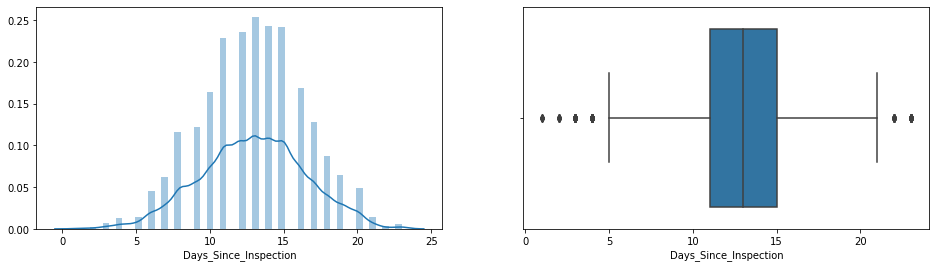

In [29]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Days_Since_Inspection'])

plt.subplot(2,2,2)
sns.boxplot(train['Days_Since_Inspection'])

plt.show()

## Safety_Score

**a measure of how safe the plane was deemed to be**

In [30]:
train['Safety_Score'].describe()

count    10000.000000
mean        41.876406
std         16.138072
min          0.000000
25%         30.593607
50%         41.278539
75%         52.511416
max        100.000000
Name: Safety_Score, dtype: float64

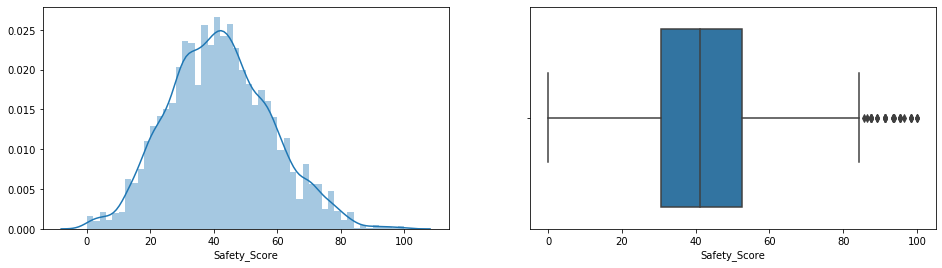

In [31]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Safety_Score'])

plt.subplot(2,2,2)
sns.boxplot(train['Safety_Score'])

plt.show()

## Target Variable: Severity

**a description (4 level factor) on the severity of the crash [Target]**

In [32]:
train['Severity'].describe()

count                         10000
unique                            4
top       Highly_Fatal_And_Damaging
freq                           3049
Name: Severity, dtype: object

In [33]:
train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

**Minor_Damage_And_Injuries** = 1.
**Significant_Damage_And_Fatalities** = 2.
**Significant_Damage_And_Serious_Injuries** = 3.
**Highly_Fatal_And_Damaging** = 0.


## Label Encoding using sklearn library their exist several other methods

In [34]:
#train.Severity[train.Severity == 'Minor_Damage_And_Injuries'] = 1
#train.Severity[train.Severity == 'Significant_Damage_And_Fatalities'] = 2
#train.Severity[train.Severity == 'Significant_Damage_And_Serious_Injuries'] = 3
#train.Severity[train.Severity == 'Highly_Fatal_And_Damaging'] = 0


In [35]:
#mapping ={'Minor_Damage_And_Injuries' :1, 'Significant_Damage_And_Fatalities':2,
          #'Significant_Damage_And_Serious_Injuries' :3, 'Highly_Fatal_And_Damaging' : 0}

#train.replace({'Severity': mapping})

**To implement of sklearn label incodor function, first convert the dataframe into numpy array it fit the data into 1-d array**


**np.ravel =** A 1-D array, containing the elements of the input, is returned.  A copy is
made only if needed

In [36]:
encode_arr=pd.DataFrame(train['Severity']).to_numpy()

In [37]:
le = LabelEncoder()
encoded = le.fit_transform(np.ravel(encode_arr)) 

In [38]:
encoded

array([1, 1, 2, ..., 3, 1, 0])

In [39]:
type(encoded)

numpy.ndarray

In [40]:
#To change the array values with same dataframe define above.

Serverity_encode=pd.DataFrame(encoded,columns=['Severity'])

train['Severity'] = Serverity_encode['Severity']

In [41]:
train.Severity.describe()

count    10000.000000
mean         1.410400
std          1.182249
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Severity, dtype: float64

In [42]:
train.pivot(columns = 'Severity')

Safety_Score                                  Days_Since_Inspection  \
Severity            0          1          2          3                     0   
0                 NaN  49.223744        NaN        NaN                   NaN   
1                 NaN  62.465753        NaN        NaN                   NaN   
2                 NaN        NaN  63.059361        NaN                   NaN   
3                 NaN        NaN        NaN  48.082192                   NaN   
4                 NaN        NaN  26.484018        NaN                   NaN   
...               ...        ...        ...        ...                   ...   
9995              NaN        NaN        NaN  56.118721                   NaN   
9996        40.365297        NaN        NaN        NaN                  10.0   
9997              NaN        NaN        NaN  27.853881                   NaN   
9998              NaN  56.210046        NaN        NaN                   NaN   
9999        50.000000        NaN        NaN        NaN                  13.0   

                           Total_Safety_Complaints        ... Max_Elevation  \
Severity     1     2     3                       0     1  ...             2   
0         14.0   NaN   NaN                     NaN  22.0  ...           NaN   
1         10.0   NaN   NaN                     NaN  27.0  ...           NaN   
2          NaN  13.0   NaN                     NaN   NaN  ...  39269.053927   
3          NaN   NaN  11.0                     NaN   NaN  ...           NaN   
4          NaN  13.0   NaN                     NaN   NaN  ...  35509.228515   
...        ...   ...   ...                     ...   ...  ...           ...   
9995       NaN   NaN   8.0                     NaN   NaN  ...           NaN   
9996       NaN   NaN   NaN                     7.0   NaN  ...           NaN   
9997       NaN   NaN  17.0                     NaN   NaN  ...           NaN   
9998       8.0   NaN   NaN                     NaN   0.0  ...           NaN   
9999       NaN   NaN   NaN                     3.0   NaN  ...           NaN   

                       Violations                Adverse_Weather_Metric  \
Severity             3          0    1    2    3                      0   
0                  NaN        NaN  3.0  NaN  NaN                    NaN   
1                  NaN        NaN  2.0  NaN  NaN                    NaN   
2                  NaN        NaN  NaN  3.0  NaN                    NaN   
3         42771.499200        NaN  NaN  NaN  1.0                    NaN   
4                  NaN        NaN  NaN  2.0  NaN                    NaN   
...                ...        ...  ...  ...  ...                    ...   
9995      38537.363408        NaN  NaN  NaN  2.0                    NaN   
9996               NaN        2.0  NaN  NaN  NaN               0.074898   
9997      33771.996300        NaN  NaN  NaN  3.0                    NaN   
9998               NaN        NaN  2.0  NaN  NaN                    NaN   
9999               NaN        2.0  NaN  NaN  NaN               0.017036   

                                        
Severity         1         2         3  
0         0.424352       NaN       NaN  
1         0.352350       NaN       NaN  
2              NaN  0.003364       NaN  
3              NaN       NaN  0.211728  
4              NaN  0.176883       NaN  
...            ...       ...       ...  
9995           NaN       NaN  0.026150  
9996           NaN       NaN       NaN  
9997           NaN       NaN  0.168173  
9998      0.026381       NaN       NaN  
9999           NaN       NaN       NaN  

[10000 rows x 40 columns]

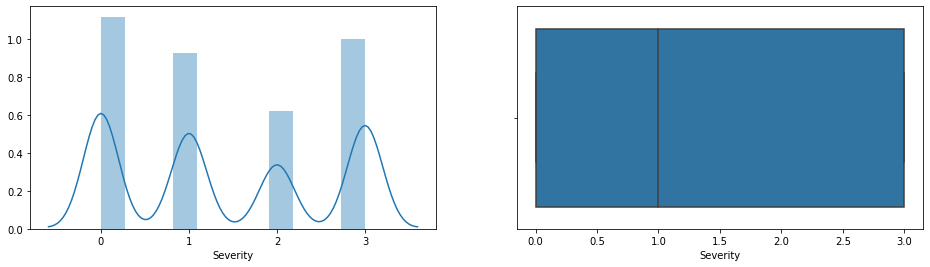

In [43]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Severity'])

plt.subplot(2,2,2)
sns.boxplot(train['Severity'])

plt.show()

# Bivariate analysis
        1. Comparises more than one attribute in a graph.
        2. Visualization of graph.
        3. Uncover hidden pattern and relation between the attributes.


Here we describe which attribute is Categorical and Quantitative:

**Categorical:**

1.Violations.

2.Accident_Type_Code.

3.Days_Since_Inspection.

4.**Target Variable**: Severity

Accident_Id either consider in any of the column.

**Quantitative:**

1.Adverse_Weather_Metric

2.Max_Elevation

3.Cabin_Temperature

4.Turbulence_In_gforces

5.Control_Metric

6.Total_Safety_Complaints

7.Safety_Score


## Compare both Categorical and Quantitative attributes together.

## 1.Adverse_Weather_Metric

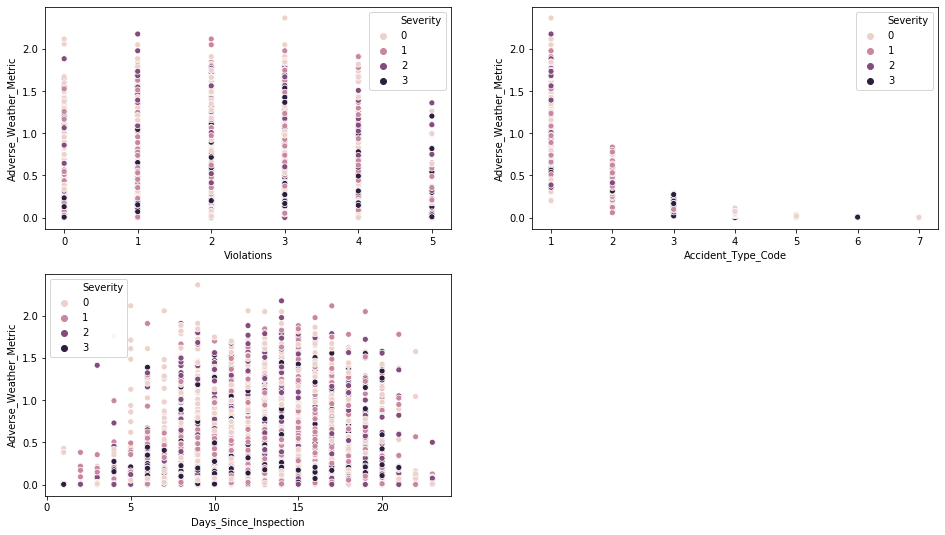

In [44]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.scatterplot(x='Violations',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.scatterplot(x='Accident_Type_Code',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.scatterplot(x='Days_Since_Inspection',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.show()

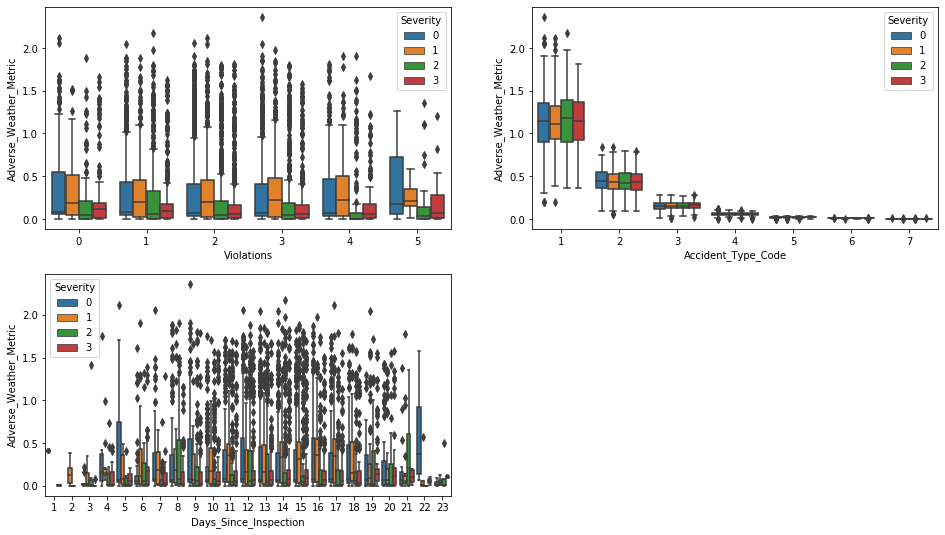

In [45]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x='Violations',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.boxplot(x='Accident_Type_Code',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.boxplot(x='Days_Since_Inspection',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.show()

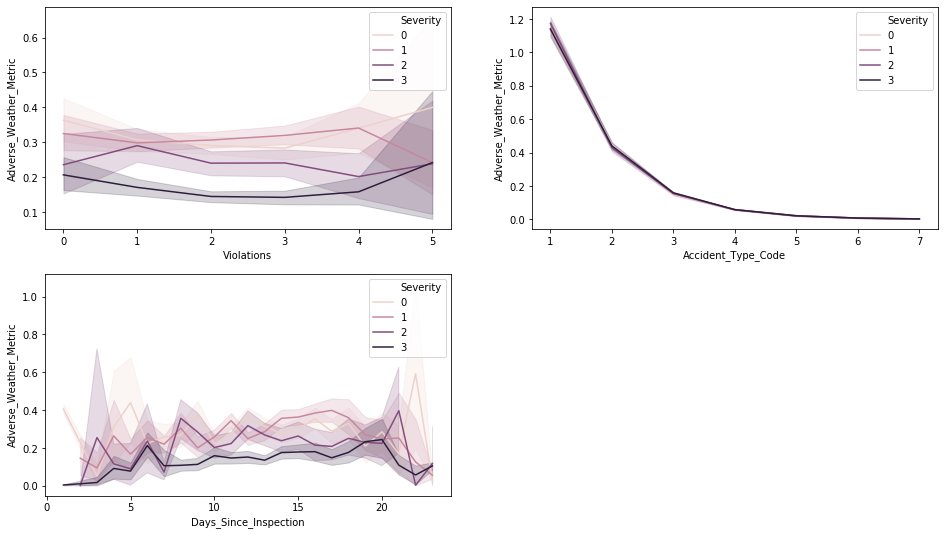

In [46]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.lineplot(x='Violations',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.lineplot(x='Accident_Type_Code',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.lineplot(x='Days_Since_Inspection',y='Adverse_Weather_Metric',data=train,hue='Severity')

plt.show()

# 2.Max_Elevation

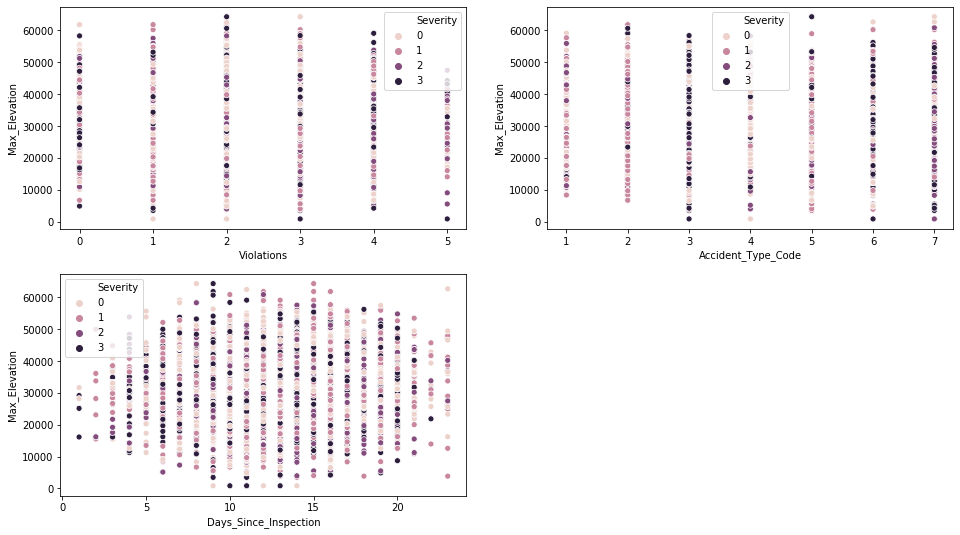

In [47]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.scatterplot(x='Violations',y='Max_Elevation',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.scatterplot(x='Accident_Type_Code',y='Max_Elevation',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.scatterplot(x='Days_Since_Inspection',y='Max_Elevation',data=train,hue='Severity')

plt.show()

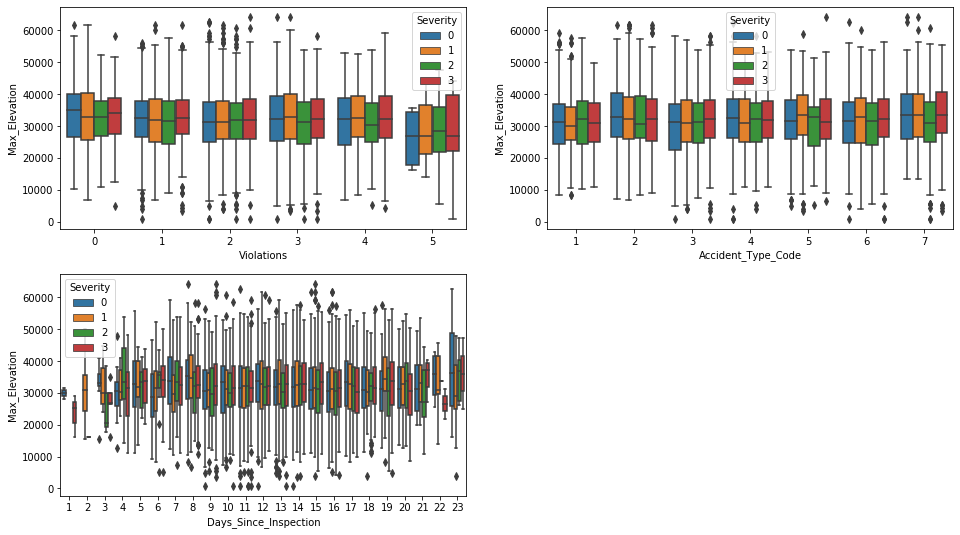

In [48]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x='Violations',y='Max_Elevation',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.boxplot(x='Accident_Type_Code',y='Max_Elevation',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.boxplot(x='Days_Since_Inspection',y='Max_Elevation',data=train,hue='Severity')

plt.show()

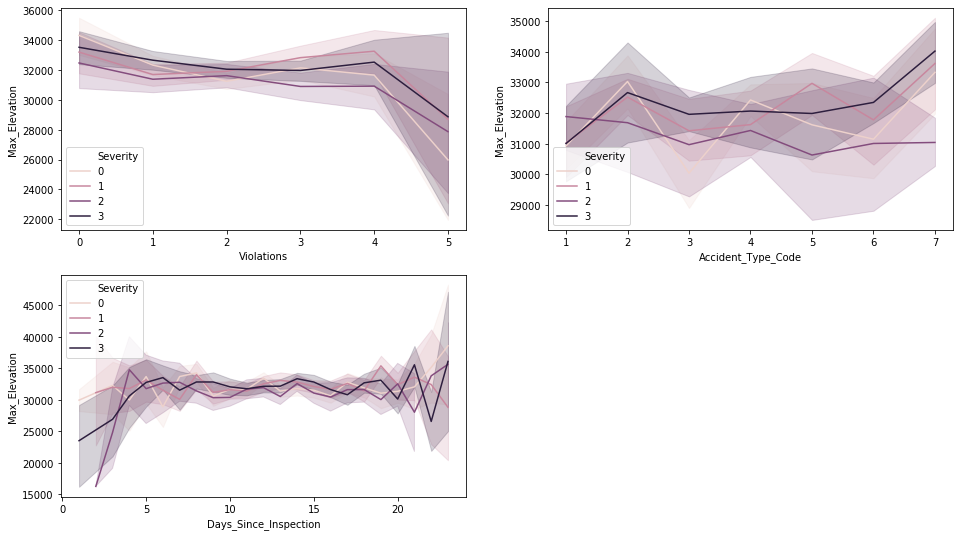

In [49]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.lineplot(x='Violations',y='Max_Elevation',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.lineplot(x='Accident_Type_Code',y='Max_Elevation',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.lineplot(x='Days_Since_Inspection',y='Max_Elevation',data=train,hue='Severity')

plt.show()

# 3.Cabin_Temperature

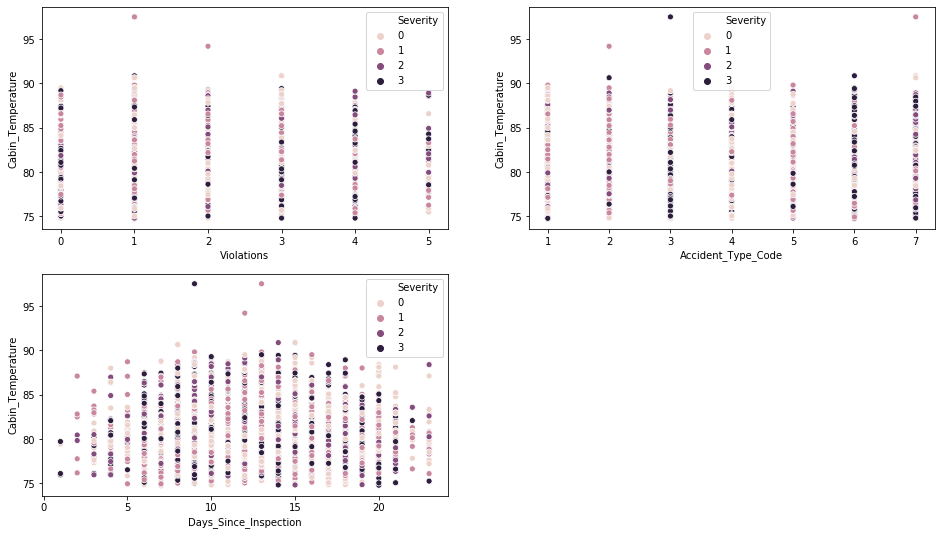

In [50]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.scatterplot(x='Violations',y='Cabin_Temperature',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.scatterplot(x='Accident_Type_Code',y='Cabin_Temperature',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.scatterplot(x='Days_Since_Inspection',y='Cabin_Temperature',data=train,hue='Severity')

plt.show()

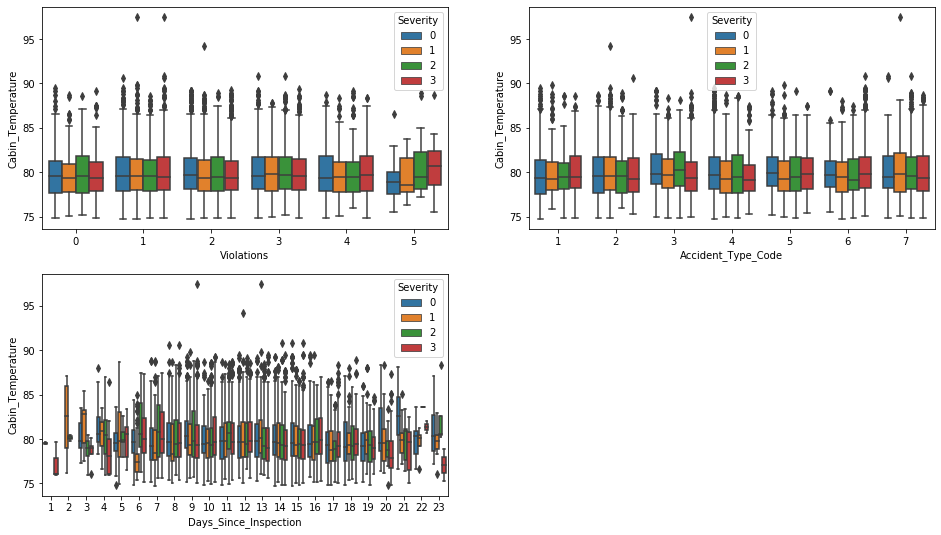

In [51]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x='Violations',y='Cabin_Temperature',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.boxplot(x='Accident_Type_Code',y='Cabin_Temperature',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.boxplot(x='Days_Since_Inspection',y='Cabin_Temperature',data=train,hue='Severity')

plt.show()

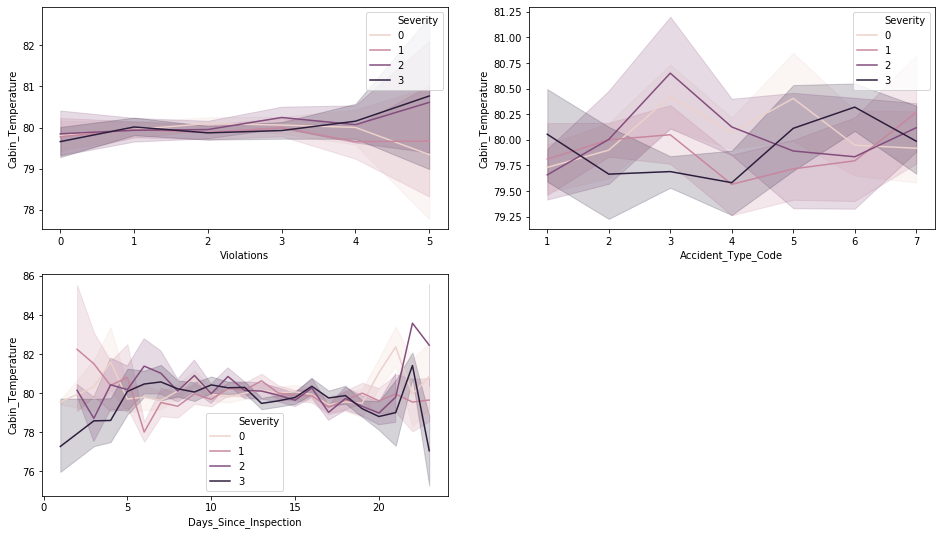

In [52]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.lineplot(x='Violations',y='Cabin_Temperature',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.lineplot(x='Accident_Type_Code',y='Cabin_Temperature',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.lineplot(x='Days_Since_Inspection',y='Cabin_Temperature',data=train,hue='Severity')

plt.show()

# 4.Turbulence_In_gforces

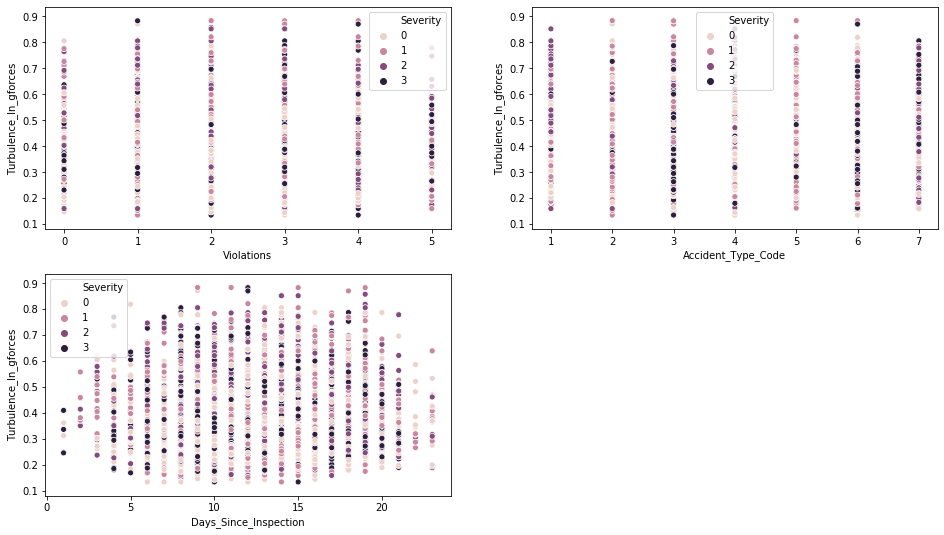

In [53]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.scatterplot(x='Violations',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.scatterplot(x='Accident_Type_Code',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.scatterplot(x='Days_Since_Inspection',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.show()

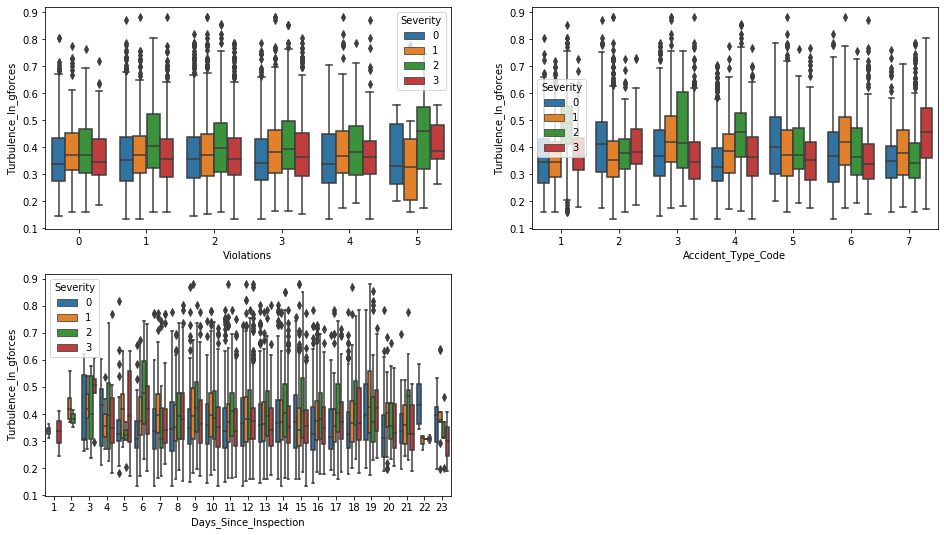

In [54]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x='Violations',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.boxplot(x='Accident_Type_Code',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.boxplot(x='Days_Since_Inspection',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.show()

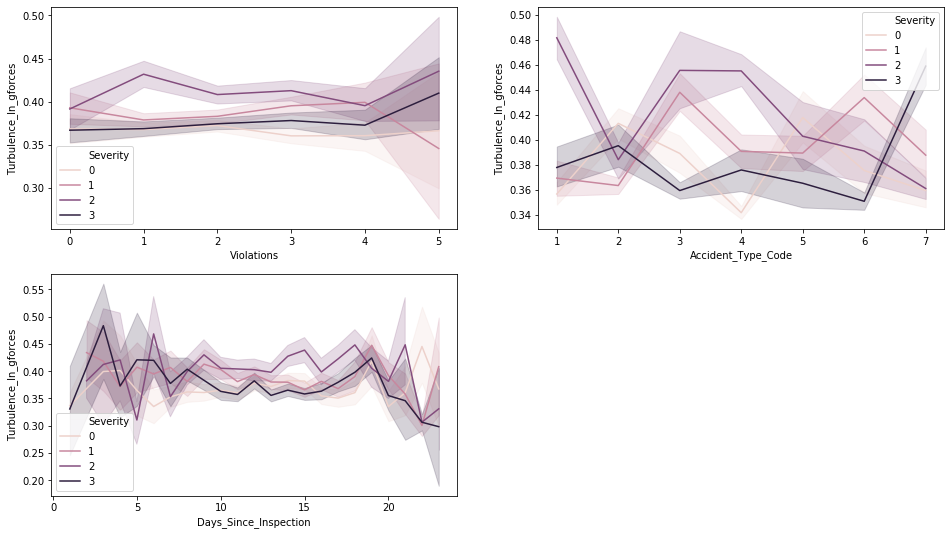

In [55]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.lineplot(x='Violations',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.lineplot(x='Accident_Type_Code',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.lineplot(x='Days_Since_Inspection',y='Turbulence_In_gforces',data=train,hue='Severity')

plt.show()

# 5.Control_Metric

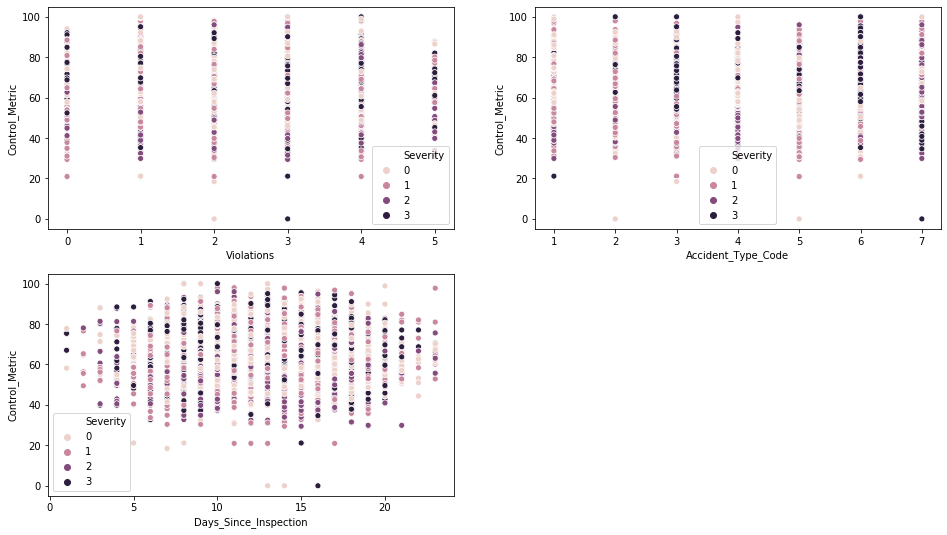

In [56]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.scatterplot(x='Violations',y='Control_Metric',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.scatterplot(x='Accident_Type_Code',y='Control_Metric',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.scatterplot(x='Days_Since_Inspection',y='Control_Metric',data=train,hue='Severity')

plt.show()

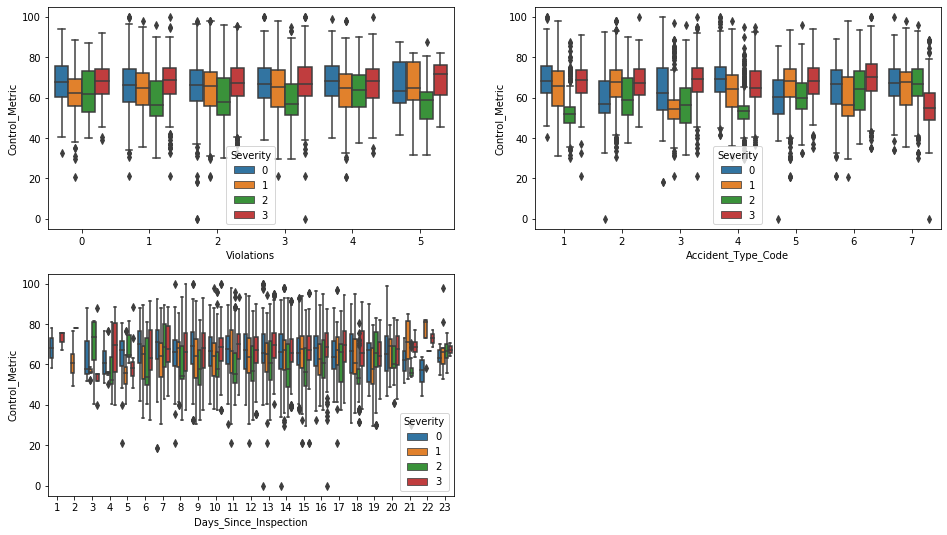

In [57]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x='Violations',y='Control_Metric',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.boxplot(x='Accident_Type_Code',y='Control_Metric',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.boxplot(x='Days_Since_Inspection',y='Control_Metric',data=train,hue='Severity')

plt.show()

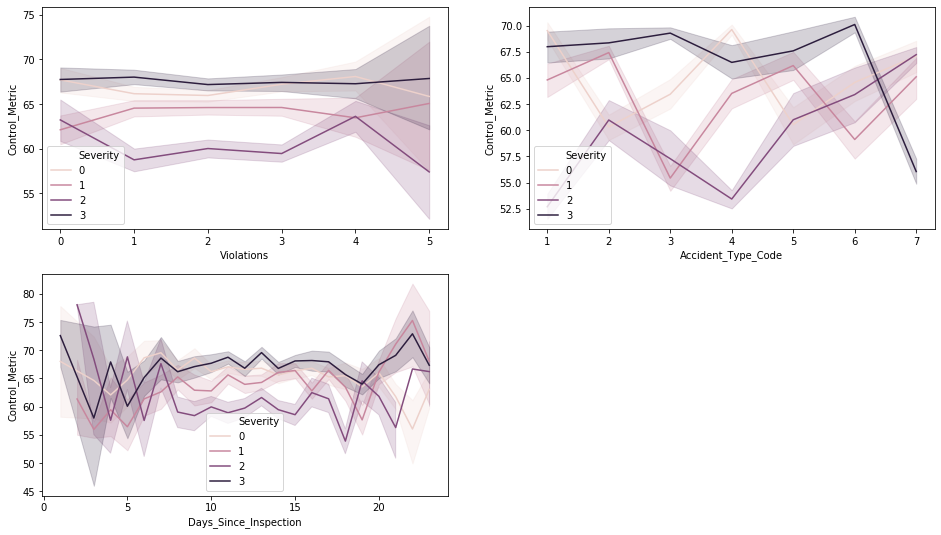

In [58]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.lineplot(x='Violations',y='Control_Metric',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.lineplot(x='Accident_Type_Code',y='Control_Metric',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.lineplot(x='Days_Since_Inspection',y='Control_Metric',data=train,hue='Severity')

plt.show()

# 6.Total_Safety_Complaints

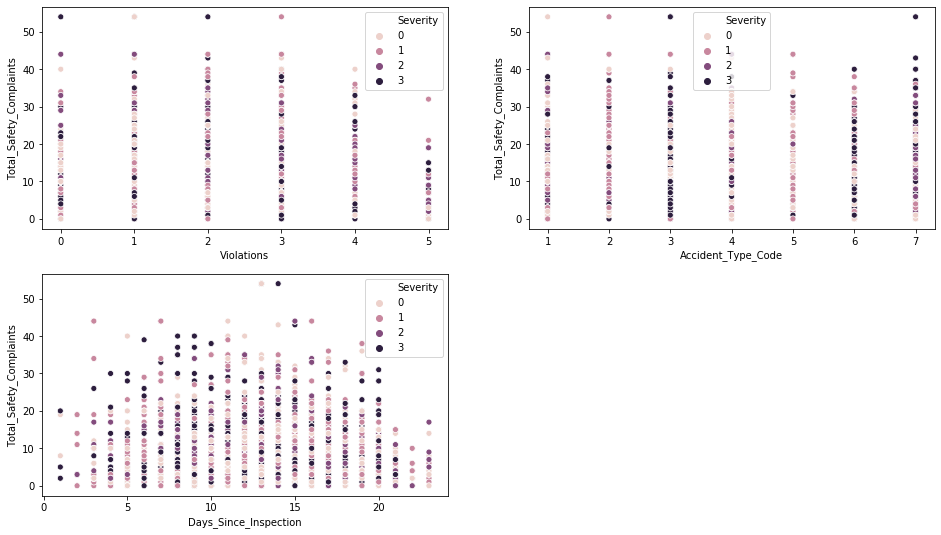

In [59]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.scatterplot(x='Violations',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.scatterplot(x='Accident_Type_Code',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.scatterplot(x='Days_Since_Inspection',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.show()

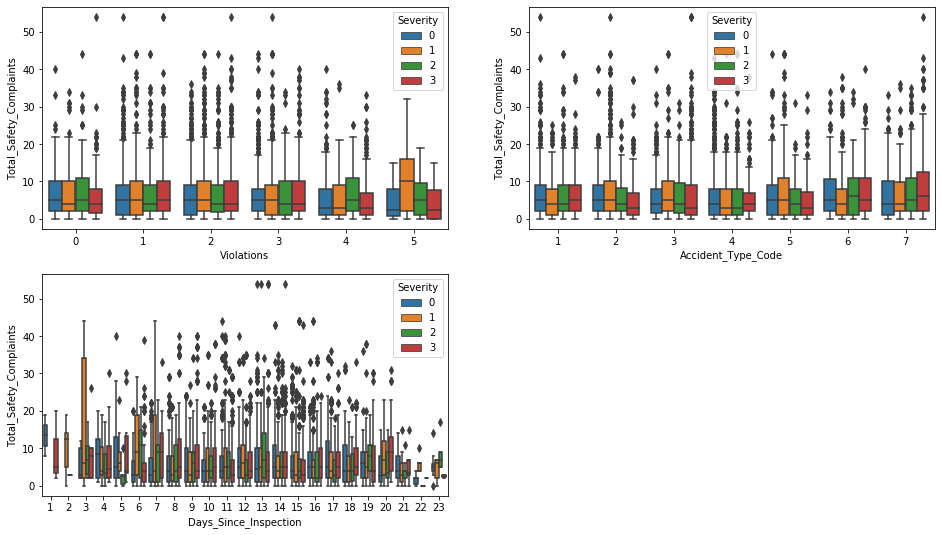

In [60]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x='Violations',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.boxplot(x='Accident_Type_Code',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.boxplot(x='Days_Since_Inspection',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.show()

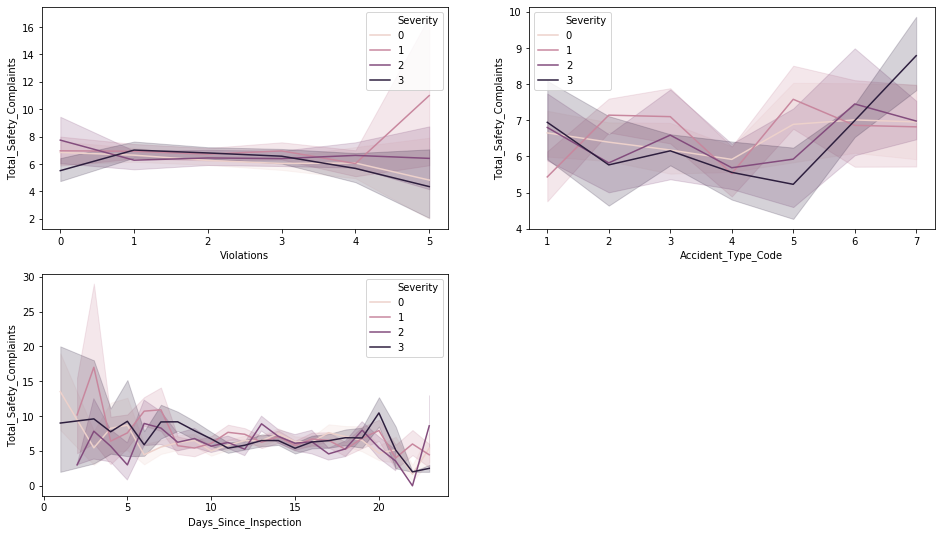

In [61]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.lineplot(x='Violations',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.lineplot(x='Accident_Type_Code',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.lineplot(x='Days_Since_Inspection',y='Total_Safety_Complaints',data=train,hue='Severity')

plt.show()

# 7.Safety_Score

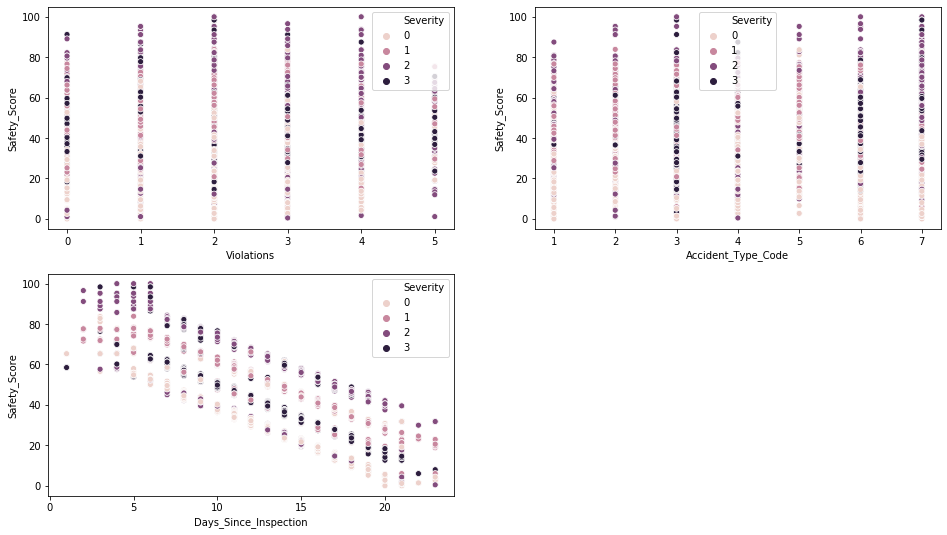

In [62]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.scatterplot(x='Violations',y='Safety_Score',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.scatterplot(x='Accident_Type_Code',y='Safety_Score',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.scatterplot(x='Days_Since_Inspection',y='Safety_Score',data=train,hue='Severity')

plt.show()

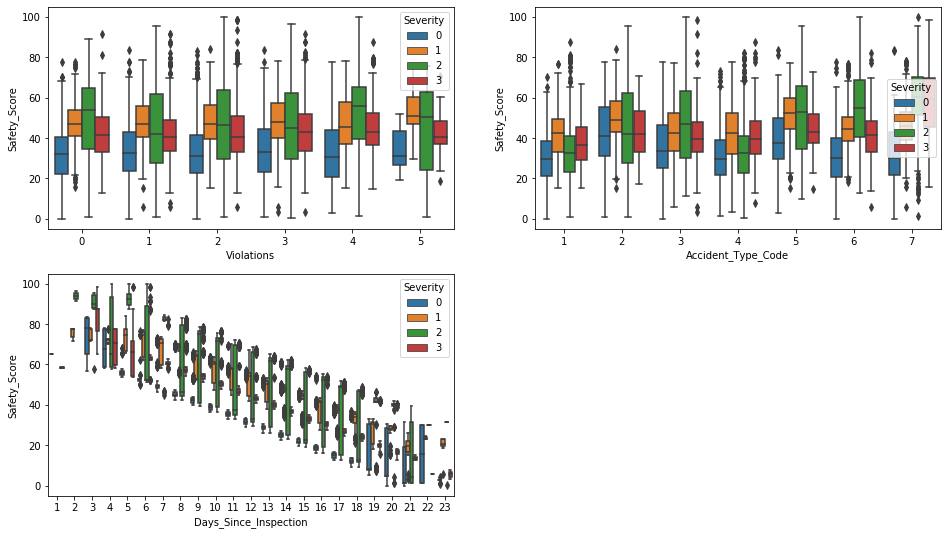

In [63]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.boxplot(x='Violations',y='Safety_Score',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.boxplot(x='Accident_Type_Code',y='Safety_Score',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.boxplot(x='Days_Since_Inspection',y='Safety_Score',data=train,hue='Severity')

plt.show()

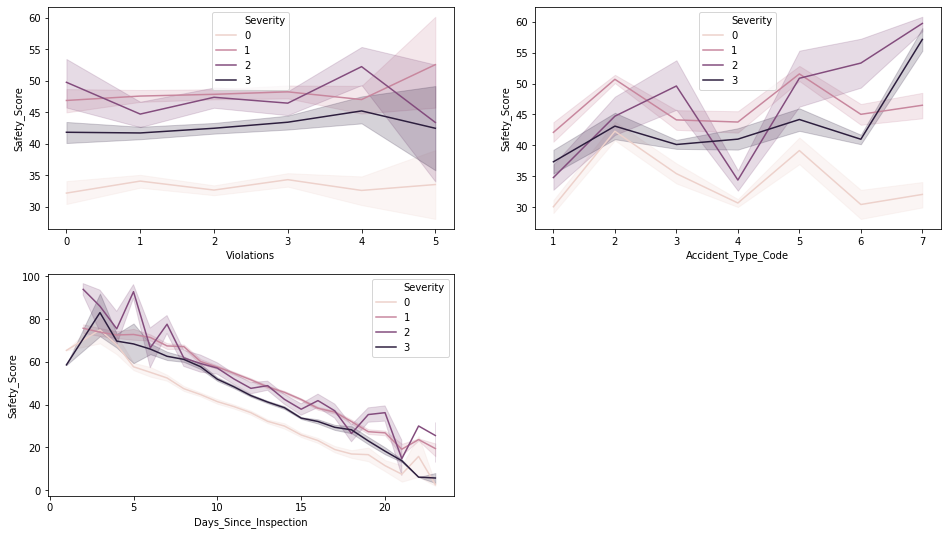

In [64]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.lineplot(x='Violations',y='Safety_Score',data=train,hue='Severity')

plt.subplot(2,2,2)
sns.lineplot(x='Accident_Type_Code',y='Safety_Score',data=train,hue='Severity')

plt.subplot(2,2,3)
sns.lineplot(x='Days_Since_Inspection',y='Safety_Score',data=train,hue='Severity')

plt.show()

## Split of Data.

In [65]:
# Here X contain independent variables
X= train.drop('Severity',axis=1)
# Here y contain Dependent variables
y=train['Severity']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)

# model1=RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
model1 = RandomForestClassifier(n_estimators=100,random_state=None,max_features = 'sqrt',n_jobs=-1, verbose = 1)
model1.fit(X_train,y_train)
y_predect1 = model1.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [69]:
print(confusion_matrix(y_test,y_predect1))
print(classification_report(y_test,y_predect1))
print(accuracy_score(y_test, y_predect1))

[[851  24  22  20]
 [ 19 739  12  17]
 [  8  31 451  13]
 [ 28  27   6 732]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       917
           1       0.90      0.94      0.92       787
           2       0.92      0.90      0.91       503
           3       0.94      0.92      0.93       793

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

0.9243333333333333


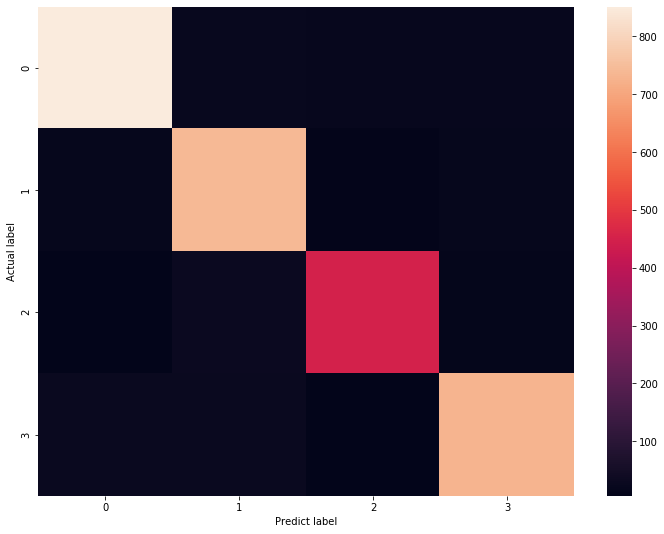

In [70]:
# create heapmap using seaborn
cm=confusion_matrix(y_test,y_predect1)

plt.figure(figsize=(12,9))

sns.heatmap(cm)
plt.ylabel('Actual label');
plt.xlabel('Predict label');
plt.show()

## model2= SVM

In [71]:
from sklearn.svm import SVC

In [72]:
model2 = SVC(kernel= 'poly', degree=8)
model2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
y_predict2 = model2.predict(X_test)

In [74]:
print(confusion_matrix(y_test,y_predict2))
print(classification_report(y_test,y_predict2))
print(accuracy_score(y_test, y_predict2))

[[915   2   0   0]
 [784   3   0   0]
 [502   1   0   0]
 [793   0   0   0]]
              precision    recall  f1-score   support

           0       0.31      1.00      0.47       917
           1       0.50      0.00      0.01       787
           2       0.00      0.00      0.00       503
           3       0.00      0.00      0.00       793

    accuracy                           0.31      3000
   macro avg       0.20      0.25      0.12      3000
weighted avg       0.22      0.31      0.15      3000

0.306


/home/parrot/anaconda3/envs/Sepsis-predict/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


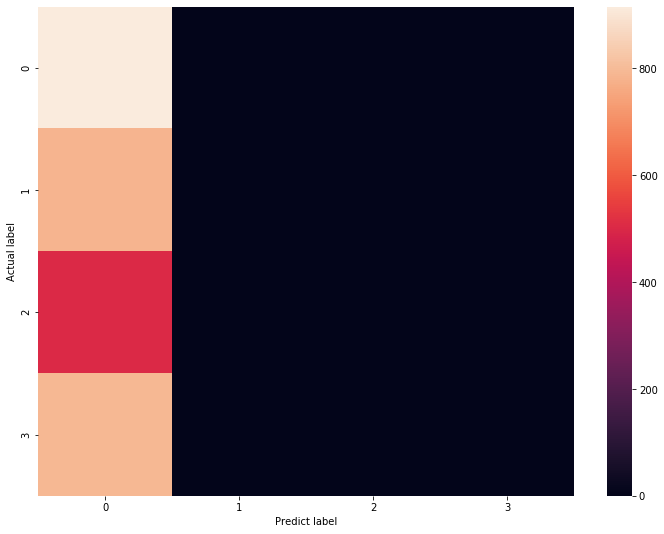

In [75]:
# create heapmap using seaborn
cm=confusion_matrix(y_test,y_predict2)

plt.figure(figsize=(12,9))

sns.heatmap(cm)
plt.ylabel('Actual label');
plt.xlabel('Predict label');
plt.show()

## model3= Xgboost

In [76]:
from xgboost import XGBClassifier

In [77]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [78]:
y_predict3 = model3.predict(X_test)

## Predict the accuracy of model.

In [79]:
print(confusion_matrix(y_test,y_predict3))
print(classification_report(y_test,y_predict3))
print(accuracy_score(y_test, y_predict3))

[[874  10  22  11]
 [ 11 755   3  18]
 [  7   3 481  12]
 [ 19   6   3 765]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       917
           1       0.98      0.96      0.97       787
           2       0.94      0.96      0.95       503
           3       0.95      0.96      0.96       793

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

0.9583333333333334


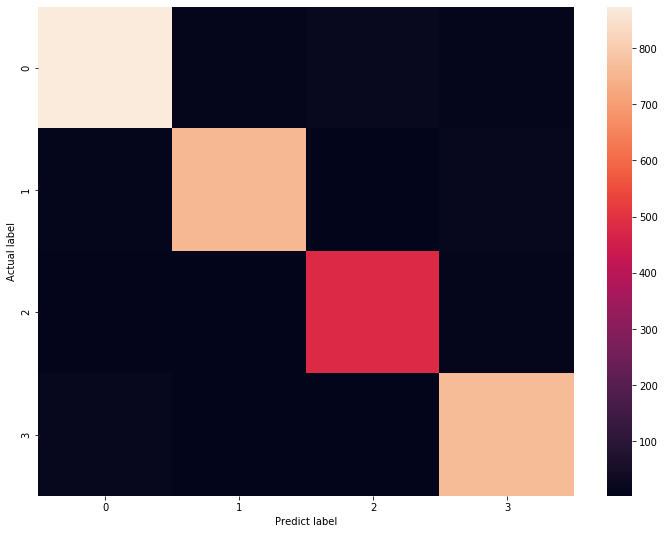

In [80]:
# create heapmap using seaborn
cm=confusion_matrix(y_test,y_predict3)

plt.figure(figsize=(12,9))

sns.heatmap(cm)
plt.ylabel('Actual label');
plt.xlabel('Predict label');
plt.show()

In [99]:
test=pd.read_csv('test.csv')

In [100]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [93]:
sample=pd.read_csv('sample_submission.csv')

In [101]:
sample.head()

,Accident_ID,Severity
0,1,Minor_Damage_And_Injuries
1,10,Highly_Fatal_And_Damaging
2,14,Highly_Fatal_And_Damaging
3,17,Significant_Damage_And_Serious_Injuries
4,21,Minor_Damage_And_Injuries


In [103]:
X_test_model= test.drop('Accident_ID',axis=1)
# Here y contain Dependent variables
y_model=test['Accident_ID']

**predict on dataset which provide for prediction using previous model**

In [104]:
y_predict_test = model3.predict(X_test_model)

In [106]:
predict_test=pd.DataFrame(y_predict_test,columns=['Severity'])


In [115]:
predict_test.head()

,Severity,Accident_ID
0,Highly_Fatal_And_Damaging,1
1,Significant_Damage_And_Fatalities,10
2,Significant_Damage_And_Serious_Injuries,14
3,Highly_Fatal_And_Damaging,17
4,Significant_Damage_And_Fatalities,21


In [108]:
predict_test['Accident_ID']=y_model

In [109]:
predict_test

,Severity,Accident_ID
0,0,1
1,2,10
2,3,14
3,0,17
4,2,21
...,...,...
2495,0,12484
2496,3,12487
2497,3,12488
2498,3,12491


**Mapping of variable**

In [113]:
mapping ={1: 'Minor_Damage_And_Injuries', 2: 'Significant_Damage_And_Fatalities',
          3: 'Significant_Damage_And_Serious_Injuries' ,0: 'Highly_Fatal_And_Damaging' }

predict_test.replace({'Severity': mapping}, inplace=True)

In [118]:
predict_test.head()

,Severity,Accident_ID
0,Highly_Fatal_And_Damaging,1
1,Significant_Damage_And_Fatalities,10
2,Significant_Damage_And_Serious_Injuries,14
3,Highly_Fatal_And_Damaging,17
4,Significant_Damage_And_Fatalities,21


In [120]:
pd.DataFrame(predict_test).to_csv('Airplane_accident_sample_submission.csv')